In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

In [4]:
plt.style.use('seaborn-darkgrid')

In [5]:
from sklearn.preprocessing import StandardScaler

def data_preprocessing(df_input):
    # numeric feature standardization
    sc = StandardScaler()    
    column_names = df_input.columns[1:11]
    df = pd.DataFrame(sc.fit_transform(df_input.iloc[:, 1:11]))
    df.columns = column_names
    
    # reverse one-hot encoding
    Wilderness_Area = df_input.iloc[:, 11:15].idxmax(1).str.replace('Wilderness_Area', '')
    df['Wilderness_Area'] = pd.to_numeric(Wilderness_Area)
    
    # reverse one-hot encoding
    Soil_Type = df_input.iloc[:, 15:55].idxmax(1).str.replace('Soil_Type', '')
    df['Soil_Type'] = pd.to_numeric(Soil_Type)
    
    return df.join(df_input.iloc[:, 11:55])

In [6]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [7]:
train_df.head()

Id  Elevation  Aspect  Slope  \
0  832ff325-90ce-40e3-8c74-42b679b99e5c       2941      32      4   
1  6ea6b99e-c247-40d9-87fe-345aab8e87a4       2304      20     19   
2  d28eb06b-19e6-4951-8845-3c7f1484393e       3397     157     13   
3  a3730218-b77f-4a97-8e34-2715172c3f31       2276     122     13   
4  c0374ece-3ad5-40f5-bd58-0dad28a20a64       2780      13      8   

   Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
0                               108                              12   
1                               350                             141   
2                               458                              46   
3                               470                             118   
4                               124                               4   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                             3369            219             230   
1                             1423            203             195   
2                             2255            234             241   
3                             1423            242             229   
4                             1959            212             223   

   Hillshade_3pm  ...  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
0            147  ...            0            0            0            0   
1            124  ...            0            0            0            0   
2            136  ...            0            0            0            0   
3            114  ...            0            0            0            0   
4            148  ...            0            0            0            0   

   Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0            0            0           2  
1            0            0            0            0            0           3  
2            0            0            1            0            0           7  
3            0            0            0            0            0           4  
4            0            0            0            0            0           5  

[5 rows x 56 columns]

In [8]:
X = data_preprocessing(train_df)
y = train_df.iloc[:, -1]

In [9]:
X.describe()

Elevation        Aspect         Slope  \
count  1.436400e+04  1.436400e+04  1.436400e+04   
mean   4.590530e-16  9.299780e-17  1.454327e-16   
std    1.000035e+00  1.000035e+00  1.000035e+00   
min   -2.121207e+00 -1.421982e+00 -1.953268e+00   
25%   -8.959447e-01 -8.317977e-01 -7.701582e-01   
50%    6.250123e-03 -2.870119e-01 -1.786032e-01   
75%    8.510108e-01  9.387561e-01  6.495739e-01   
max    2.631470e+00  1.846732e+00  4.198904e+00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      1.436400e+04                    1.436400e+04   
mean                       4.155221e-17                    1.830276e-17   
std                        1.000035e+00                    1.000035e+00   
min                       -1.079739e+00                   -3.209846e+00   
25%                       -7.612091e-01                   -7.517388e-01   
50%                       -2.239869e-01                   -3.122097e-01   
75%                        4.606149e-01                    4.528964e-01   
max                        5.305123e+00                    8.185352e+00   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     1.436400e+04   1.436400e+04    1.436400e+04   
mean                      4.155221e-17   6.925368e-17   -1.736289e-16   
std                       1.000035e+00   1.000035e+00    1.000035e+00   
min                      -1.293523e+00  -6.952913e+00   -5.259876e+00   
25%                      -7.172421e-01  -5.461785e-01   -5.230471e-01   
50%                      -3.008717e-01   2.383196e-01    1.348457e-01   
75%                       4.136335e-01   7.286309e-01    7.050196e-01   
max                       3.903564e+00   1.349692e+00    1.538351e+00   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type31  \
count   1.436400e+04                        1.436400e+04  ...  14364.000000   
mean    2.019487e-16                       -1.385074e-17  ...      0.021721   
std     1.000035e+00                        1.000035e+00  ...      0.145776   
min    -2.943796e+00                       -1.370429e+00  ...      0.000000   
25%    -6.330169e-01                       -7.098444e-01  ...      0.000000   
50%     6.457684e-02                       -2.338618e-01  ...      0.000000   
75%     6.967712e-01                        4.294372e-01  ...      0.000000   
max     2.462555e+00                        4.957607e+00  ...      1.000000   

        Soil_Type32   Soil_Type33   Soil_Type34   Soil_Type35   Soil_Type36  \
count  14364.000000  14364.000000  14364.000000  14364.000000  14364.000000   
mean       0.045322      0.040309      0.001392      0.007031      0.000696   
std        0.208016      0.196690      0.037290      0.083561      0.026377   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type37   Soil_Type38   Soil_Type39   Soil_Type40  
count  14364.000000  14364.000000  14364.000000  14364.000000  
mean       0.002228      0.047828      0.043581      0.030632  
std        0.047149      0.213409      0.204168      0.172325  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 56 columns]

In [10]:
# oversampling by Soil_Type

for i in range(5):
    threshold = X.Soil_Type.value_counts().median()
    need_over_sample_types = X.Soil_Type.value_counts()[(X.Soil_Type.value_counts() < threshold)].index
    oversampling_rows = X[X['Soil_Type'].isin(need_over_sample_types)].copy()
    
    y = y.append(y[oversampling_rows.index])
    X = X.append(oversampling_rows)

    y.reset_index(drop=True, inplace=True)
    X.reset_index(drop=True, inplace=True)

In [11]:
# oversampling by Wilderness_Area

for i in range(5):
    oversampling_rows = X[X['Wilderness_Area']==X.Wilderness_Area.value_counts().idxmin()].copy()
    
    y = y.append(y[oversampling_rows.index])
    X = X.append(oversampling_rows)

    y.reset_index(drop=True, inplace=True)
    X.reset_index(drop=True, inplace=True)

### Build Network

In [12]:
# prepare data for model
labels = pd.get_dummies(y)
num_labels = len(set(y))
feature_size = X.shape[1]

In [13]:
# setting hyperparameter
epochs = 3000
batch_size = 4096
train_ratio = 0.8

reg_rate = 0.001
drop_rate = 0.1

init_nodes = 256

In [14]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

model = tf.keras.Sequential()
model.add(Dense(init_nodes, activation='relu', input_shape=(feature_size,)))

nodes = init_nodes//2
for i in range(5):
    model.add(Dropout(drop_rate))
    print(nodes)
    model.add(Dense(nodes, activation='relu', kernel_regularizer=regularizers.l2(reg_rate)))
    nodes = nodes//2

model.add(Dense(num_labels, activation='softmax'))

print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
128
64
32
16
8
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               14592     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
# setting early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=50)

In [17]:
model_history = model.fit(x=X, y=labels,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1-train_ratio,
                          verbose=0,
                          callbacks=[early_stopping])

In [18]:
# print final acc/loss values
for key, value in model_history.history.items():
    print(key, '=', value[-1])

loss = 0.16562336744761022
acc = 0.97068423
val_loss = 0.11557122372113032
val_acc = 0.9921025


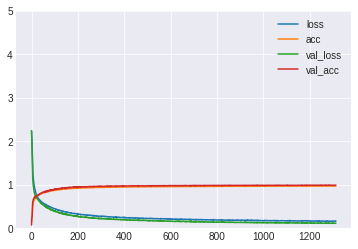

In [19]:
# plot train histories
for key, value in model_history.history.items():
    plt.plot(value, label=key)

plt.ylim(0, 5)

plt.legend()
plt.show()

In [20]:
# perform prediction
X_test = data_preprocessing(test_df)
y_out = model.predict_classes(X_test)
predict_class = y_out+1

In [21]:
y_out

array([4, 3, 2, 4, 1, 0, 5, 4, 3, 1, 4, 3, 2, 0, 0, 6, 5, 2, 2, 5, 4, 0,
       0, 2, 1, 0, 0, 4, 2, 4, 5, 1, 2, 2, 0, 6, 2, 6, 3, 4, 6, 5, 1, 4,
       3, 6, 5, 1, 3, 6, 2, 2, 4, 5, 5, 5, 4, 4, 0, 3, 1, 3, 2, 3, 2, 4,
       4, 5, 6, 2, 1, 5, 3, 4, 0, 5, 1, 4, 1, 5, 0, 2, 5, 1, 1, 2, 0, 6,
       3, 2, 4, 3, 5, 4, 6, 5, 6, 6, 2, 1, 0, 3, 2, 4, 4, 6, 0, 6, 4, 5,
       6, 0, 0, 4, 2, 5, 6, 1, 4, 6, 2, 6, 6, 5, 0, 5, 4, 3, 6, 4, 5, 5,
       3, 2, 1, 2, 6, 6, 4, 4, 2, 1, 3, 1, 0, 6, 3, 2, 3, 5, 3, 2, 3, 0,
       5, 4, 0, 3, 2, 4, 2, 1, 4, 5, 3, 1, 5, 6, 0, 1, 3, 6, 3, 1, 1, 5,
       5, 5, 6, 4, 1, 3, 3, 5, 6, 2, 4, 4, 5, 0, 1, 3, 5, 6, 6, 2, 3, 5,
       0, 2, 2, 4, 1, 5, 0, 5, 3, 4, 0, 4, 4, 6, 1, 3, 2, 0, 6, 0, 0, 0,
       6, 1, 3, 3, 2, 4, 5, 6, 2, 2, 3, 0, 1, 5, 4, 2, 0, 0, 0, 3, 6, 2,
       0, 0, 1, 1, 0, 5, 5, 5, 3, 0, 3, 4, 5, 2, 6, 2, 0, 3, 1, 0, 5, 4,
       6, 6, 4, 4, 3, 2, 4, 2, 0, 2, 0, 1, 5, 5, 3, 0, 4, 1, 0, 0, 2, 3,
       5, 5, 0, 5, 4, 0, 3, 4, 4, 4, 1, 1, 0, 2, 0,

### Write predicted results to .csv file

In [22]:
output = pd.DataFrame({'Id': test_df.loc[:, 'Id'], 'class': predict_class})
# output.to_csv('./output-keras.csv', index=False)

In [23]:
output

Id  class
0    341a81cc-9083-4d08-8376-95d2a57fe5de      5
1    157d4621-8e31-489c-b639-0406a649c7fd      4
2    b0140a7f-1bab-4fe0-b23b-d95c7cff329e      3
3    551a9fbe-7b78-4250-8c97-73b90f4545a6      5
4    51246ef4-87ba-44a5-97ba-82cb31e2ef68      2
..                                    ...    ...
751  c7768010-adb9-496d-9394-3acf50340cb7      7
752  7b8aa600-3219-4139-b506-3cc9e6877980      6
753  b96752bf-f341-43f6-8742-599978f93de6      7
754  e87934a6-015e-403b-92f2-15b4ed25e802      4
755  7d95fe4c-d7c6-40f8-b2fd-705ef3fba64c      1

[756 rows x 2 columns]